In [218]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence \
    import variance_inflation_factor as  vif
from statsmodels.stats.anova import anova_lm
from ISLP import load_data
from ISLP.models import (ModelSpec as ms, 
                         summarize, poly)

In [ ]:
# Load the data
df = load_data('Auto')
df = df.dropna() # drop missing values
df.info() # check the data

In [4]:
df.head() # check the data

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [6]:
# Use sm.OLS to fit a simple linear regression model
X = sm.add_constant(df['horsepower']) # add a constant to the model
y = df['mpg']
model = sm.OLS(y, X).fit()
model.summary()
summarize(model)

,coef,std err,t,P>|t|
const,39.9359,0.717,55.660,0.0
horsepower,-0.1578,0.006,-24.489,0.0


In [ ]:
# Use sm.OLS to fit a simple linear regression model
# mpg as the response and horsepower as the predictor
# create a model specification
X = pd.DataFrame({'intercept' : np.ones(df.shape[0]), 'horsepower' : df['horsepower']})
y = df['mpg']
model2 = sm.OLS(y, X).fit()
summarize(model2)

In [35]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 26 Feb 2024   Prob (F-statistic):           7.03e-81
Time:                        14:46:46   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
conf_int = model2.conf_int(alpha=0.05)  # 95% confidence interval
conf_int

,0,1
intercept,38.525212,41.346510
horsepower,-0.170517,-0.145172


In [46]:
# Get the prediction interval
pred_int = model2.get_prediction(X).summary_frame(alpha=0.05)
pred_int.head()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,19.416046,0.297444,18.831250,20.000841,9.753295,29.078797
1,13.891480,0.462181,12.982802,14.800158,4.203732,23.579228
2,16.259151,0.384080,15.504025,17.014277,6.584598,25.933704
3,16.259151,0.384080,15.504025,17.014277,6.584598,25.933704
4,17.837598,0.337403,17.174242,18.500955,8.169775,27.505422


In [14]:
# Predict the response for a new observation with horsepower 98
new_obs = pd.DataFrame({'intercept' : [1], 'horsepower' : [98]})
model2.predict(new_obs)


0    24.467077
dtype: float64

In [164]:
design = ms(['horsepower'])
X = design.fit_transform(df)
X[:5]

# Predict the response for an obsevation with horsepower 98
new_obs = pd.DataFrame({'horsepower' : [98]})
newX = design.transform(new_obs)
# Get the predicted response
new_prediction = model2.get_prediction(newX)
new_prediction.predicted_mean




array([24.46707715])

In [30]:
# Predict the response for a new observation with horsepower 98
new_obs = pd.DataFrame({'intercept' : [1], 'horsepower' : [98]})
model2.predict(new_obs)


0    24.467077
dtype: float64

In [32]:
# Create a 95% confidence interval for the prediction
new_prediction.conf_int(alpha=0.05)

array([[23.97307896, 24.96107534]])

In [34]:
# Create a 95% prediction interval for the prediction
new_prediction.conf_int(obs=True, alpha=0.05)

array([[14.80939607, 34.12475823]])

In [48]:
# Define a funtion to to plot the data and the fitted line
def abline(ax, slope, intercept, **kws):
    """Plot a line from slope and intercept"""
    x_vals = np.array(ax.get_xlim())
    y_vals = intercept + slope * x_vals
    ax.plot(x_vals, y_vals, **kws)

/var/folders/6r/q2wyz38j5vddk8gzyblv_jh40000gn/T/ipykernel_1418/442879122.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


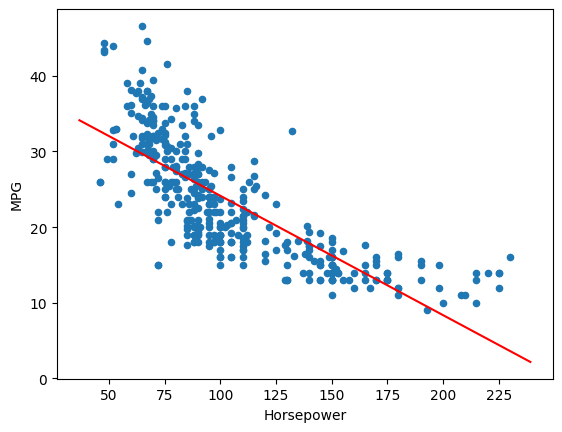

In [49]:
# Plot the data and the fitted line
fig, ax = subplots()
df.plot.scatter(x='horsepower', y='mpg', ax=ax)
abline(ax, model2.params['horsepower'], model2.params['intercept'], color='red')
ax.set_xlabel('Horsepower')
ax.set_ylabel('MPG')
fig.show()

Text(0, 0.5, 'Residuals')

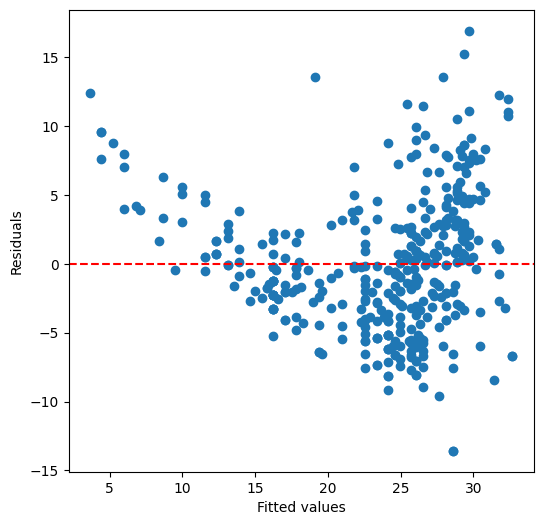

In [52]:
# Visualize the residuals
ax = subplots(figsize= (6,6))[1] # create a new figure
ax.scatter(model2.fittedvalues, model2.resid)
ax.axhline(0, color='red', linestyle='--') # add a horizontal line at 0
ax.set_xlabel('Fitted values') # set the x-axis label
ax.set_ylabel('Residuals') # set the y-axis label

In [ ]:
# Get the influence statistics
influence = model2.get_influence()
# Get the leverage
leverage = influence.hat_matrix_diag 

# Plot the residuals against the leverage
ax = subplots(figsize=(6,6))[1] # create a new figure
ax.scatter(leverage, model2.resid)
ax.set_xlabel('Leverage')
ax.set_ylabel('Residuals')
ax.set_xlim(0, 0.1) # set the x-axis limits
ax.set_ylim(-10, 10) # set the y-axis limits
ax.axhline(0, color='red', linestyle='--') # add a horizontal line at 0
ax.axhline(3, color='red', linestyle='--') # add a horizontal line at 3
ax.axhline(-3, color='red', linestyle='--') # add a horizontal line at -3


115

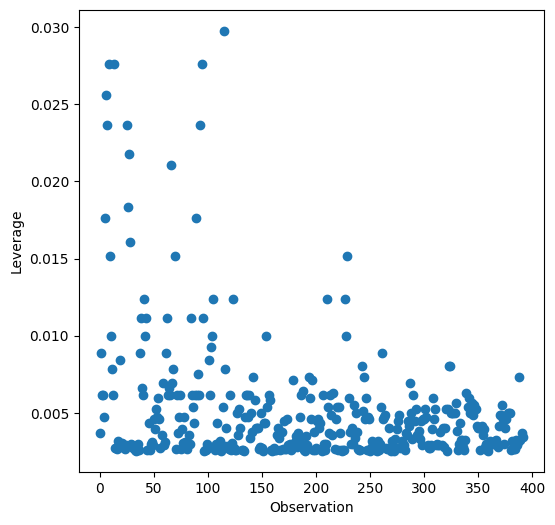

In [54]:
# Get influence statistics
influence = model2.get_influence()

ax = subplots(figsize=(6,6))[1] # create a new figure
ax.scatter(np.arange(X.shape[0]), influence.hat_matrix_diag)
ax.set_xlabel('Observation')
ax.set_ylabel('Leverage')
np.argmax(influence.hat_matrix_diag) # get the index of the observation with the highest leverage

1. Is therer a relationship between the predictor and the response?
- **a**  t-statistica mesures the segnificance för the coefficient in this case -24.489. With a value this high we say that there is a relationship betheween the predictor horsepower and the response mpg.
- **b** To decide how strong is the relationship between the predictor and the response we look at the p-value. In this case p = 0. With a value so low is an indication that the relationship due to change is very low so we can reject the **nullHypo**.
- **c** The relationship is negative as we can see the coeff for horsepower is -0.1578 so that means that a incresse in horsepower decresses the dependendent variable in this case mpg.
- **d** The predicted mpg associated with a horsepower of 98 is 24.467077 mpg
- **e** The K:I intervall for the prediction is [23.97307896, 24.96107534]
- **f** The P:I for the prediction is [14.80939607, 34.12475823]. Remember that the P:I is always wider because is including the error in the computation 

## 9. Multiple Lin Regr



array([[<Axes: xlabel='mpg', ylabel='mpg'>,
        <Axes: xlabel='cylinders', ylabel='mpg'>,
        <Axes: xlabel='displacement', ylabel='mpg'>,
        <Axes: xlabel='horsepower', ylabel='mpg'>,
        <Axes: xlabel='weight', ylabel='mpg'>,
        <Axes: xlabel='acceleration', ylabel='mpg'>,
        <Axes: xlabel='year', ylabel='mpg'>,
        <Axes: xlabel='origin', ylabel='mpg'>],
       [<Axes: xlabel='mpg', ylabel='cylinders'>,
        <Axes: xlabel='cylinders', ylabel='cylinders'>,
        <Axes: xlabel='displacement', ylabel='cylinders'>,
        <Axes: xlabel='horsepower', ylabel='cylinders'>,
        <Axes: xlabel='weight', ylabel='cylinders'>,
        <Axes: xlabel='acceleration', ylabel='cylinders'>,
        <Axes: xlabel='year', ylabel='cylinders'>,
        <Axes: xlabel='origin', ylabel='cylinders'>],
       [<Axes: xlabel='mpg', ylabel='displacement'>,
        <Axes: xlabel='cylinders', ylabel='displacement'>,
        <Axes: xlabel='displacement', ylabel='displacement

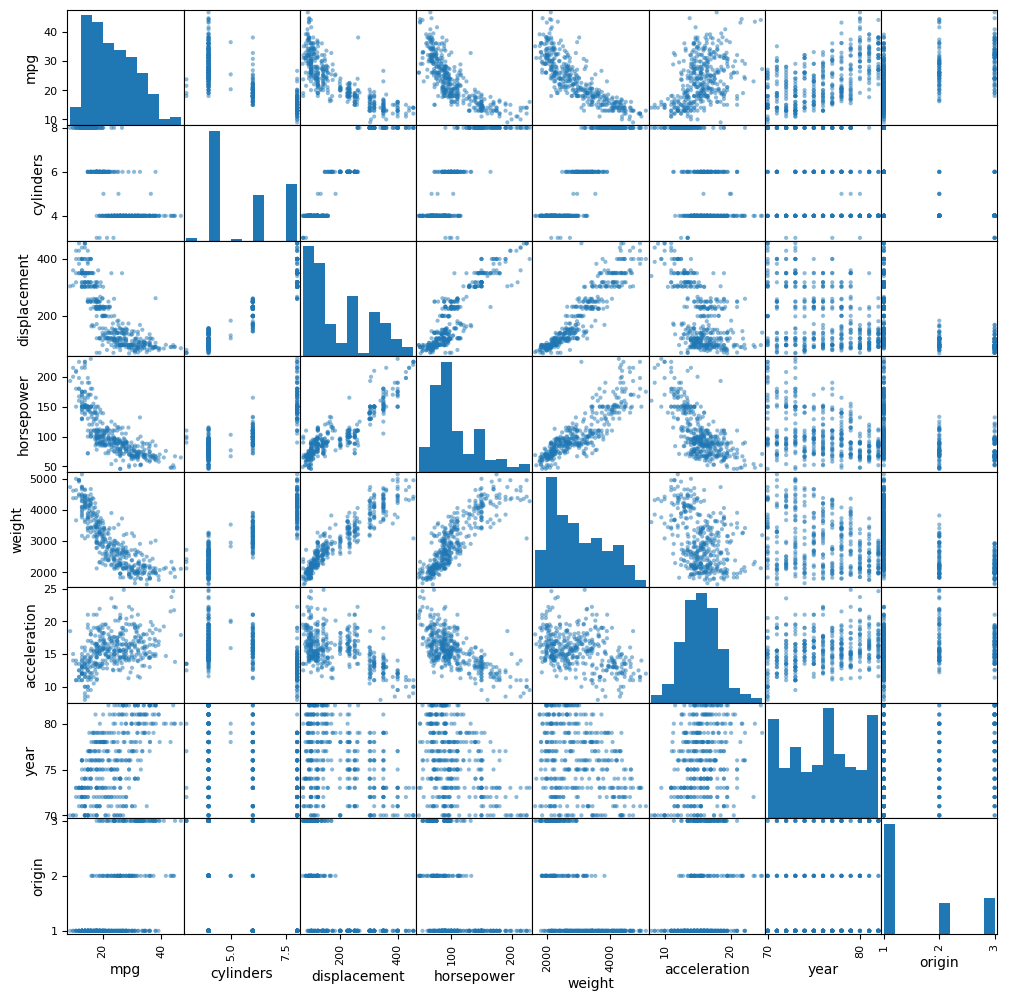

In [61]:
# Produce a scatter plot for all the variables in the data
pd.plotting.scatter_matrix(df, figsize=(12,12))


In [66]:
cor = df.corr()
cor

/var/folders/6r/q2wyz38j5vddk8gzyblv_jh40000gn/T/ipykernel_1418/3057578215.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [176]:
terms = df.columns.drop(['name', 'mpg'])
X = ms(terms).fit_transform(df) # Create the model specification
y = df['mpg'] # Create the response variable
model = sm.OLS(y, X).fit() # Fit the model
summarize(model)

,coef,std err,t,P>|t|
intercept,-17.2184,4.644,-3.707,0.000
cylinders,-0.4934,0.323,-1.526,0.128
displacement,0.0199,0.008,2.647,0.008
horsepower,-0.0170,0.014,-1.230,0.220
weight,-0.0065,0.001,-9.929,0.000
acceleration,0.0806,0.099,0.815,0.415
year,0.7508,0.051,14.729,0.000
origin,1.4261,0.278,5.127,0.000


In [215]:

X = ms(['cylinders', 'acceleration', ('cylinders', 'acceleration'), 'weight', 'acceleration']).fit_transform(df)
y = df['mpg']
model_inter = sm.OLS(y, X).fit()
summarize(model_inter)

,coef,std err,t,P>|t|
intercept,34.6538,4.609,7.518,0.000
cylinders,0.7956,0.783,1.016,0.310
acceleration,0.3558,0.147,2.420,0.016
cylinders:acceleration,-0.0902,0.051,-1.780,0.076
weight,-0.0064,0.001,-11.112,0.000
acceleration,0.3558,0.147,2.420,0.016


In [194]:
from sklearn.preprocessing import PolynomialFeatures

# Create an instance of PolynomialFeatures object of degree 2
poly = PolynomialFeatures(degree=2, include_bias=False)

# Create the polynomial features
X = poly.fit_transform

,coef,std err,t,P>|t|
x1,1.000000e+00,5.080000e-06,1.970000e+05,0.000
x2,-5.684000e-13,7.230000e-05,-7.860000e-09,1.000
x3,-7.772000e-16,1.900000e-06,-4.090000e-10,1.000
x4,-8.527000e-14,4.500000e-06,-1.890000e-08,1.000
x5,-1.332000e-15,1.800000e-07,-7.400000e-09,1.000
...,...,...,...,...
x86,4.907000e-17,2.200000e-12,2.230000e-05,1.000
x87,1.416000e-16,1.140000e-12,0.000000e+00,1.000
x88,-2.440000e-17,3.500000e-14,-1.000000e-03,0.999
x89,-7.986000e-17,3.650000e-14,-2.000000e-03,0.998


In [134]:
import statsmodels.formula.api as smf

# Define the formula using string representation
formula = "mpg ~ " + " + ".join(terms)

# Fit the model with smf.ols()
model_anova = smf.ols(formula, data=df).fit()

# Perform ANOVA
anova_table = anova_lm(model_anova)
print(anova_table)


                 df        sum_sq       mean_sq            F         PR(>F)
cylinders       1.0  14403.083079  14403.083079  1300.683788  2.319511e-125
displacement    1.0   1073.344025   1073.344025    96.929329   1.530906e-20
horsepower      1.0    403.408069    403.408069    36.430140   3.731128e-09
weight          1.0    975.724953    975.724953    88.113748   5.544461e-19
acceleration    1.0      0.966071      0.966071     0.087242   7.678728e-01
year            1.0   2419.120249   2419.120249   218.460900   1.875281e-39
origin          1.0    291.134494    291.134494    26.291171   4.665681e-07
Residual      384.0   4252.212530     11.073470          NaN            NaN


Relationship to mpg:

- There appears to be a relationship between all the predictors and mpg because the overall F-statistic is significant (p-value < 0.05). However, this doesn't guarantee individual significance for each predictor.
Statistically significant predictors:

- Cylinders, displacement, horsepower, weight, year, and origin all have p-values less than 0.05, indicating statistically significant relationships with mpg at a 95% confidence level.
Acceleration has a p-value greater than 0.05, implying no statistically significant relationship with mpg at the chosen significance level.
Coefficient interpretation (year):

- The coefficient for year is 2419.12, but interpretation depends on the coding of the year variable.
If coded numerically (e.g., 1970 as 1970), the coefficient suggests that, on average, mpg increases by 2419.12 for every year. However, this interpretation might not be meaningful if the year range is large.
If coded categorically (e.g., one-hot encoded for different year ranges), the interpretation is different for each category level. You'd need to compare the coefficients of different year categories to understand how mpg varies across them.
Important Caveats:

- While anova_lm indicates overall and individual significance, it doesn't account for multicollinearity (when predictors are highly correlated). This could inflate the significance of some predictors.
Consider visualizing the relationships between predictors and mpg using scatter plots or other techniques to gain further insights.

Text(0, 0.5, 'Sample quantiles')

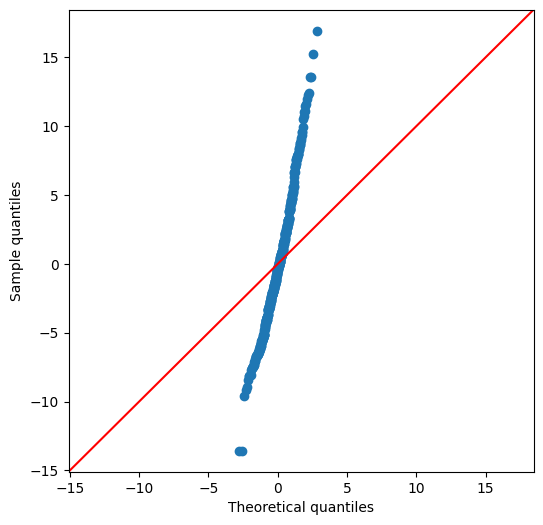

In [137]:
# prodduce diagnostic plots

ax = subplots(figsize=(6,6))[1] # create a new figure
sm.graphics.qqplot(model2.resid, line='45', ax=ax) # create a qq-plot
ax.set_xlabel('Theoretical quantiles') # set the x-axis label
ax.set_ylabel('Sample quantiles') # set the y-axis label


Text(0, 0.5, 'Residuals')

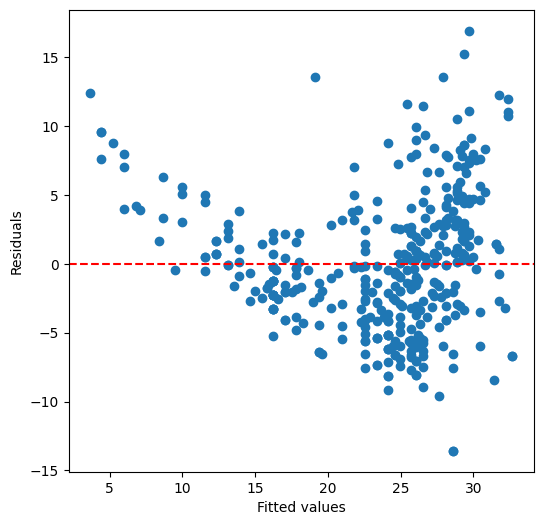

In [138]:
ax = subplots(figsize=(6,6))[1] # create a new figure
ax.scatter(model2.fittedvalues, model2.resid) # create a scatter plot of the residuals
ax.axhline(0, color='red', linestyle='--') # add a horizontal line at 0
ax.set_xlabel('Fitted values') # set the x-axis label
ax.set_ylabel('Residuals') # set the y-axis label

115

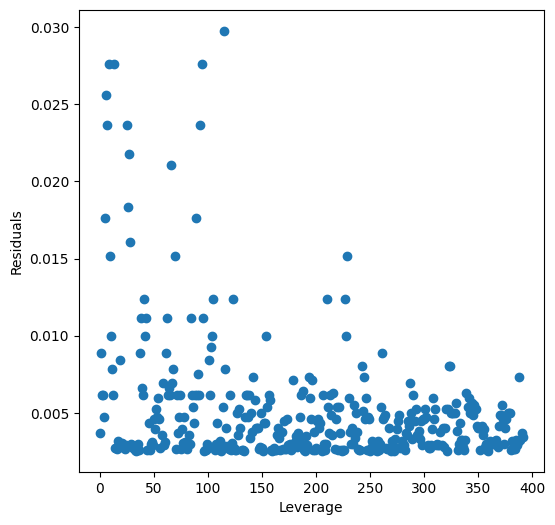

In [139]:
influence2 = model2.get_influence()
leverage2 = influence.hat_matrix_diag
ax = subplots(figsize=(6,6))[1] # create a new figure
ax.scatter(np.arange(X.shape[0]), leverage2) # create a scatter plot of the residuals
ax.set_xlabel('Leverage') # set the x-axis label
ax.set_ylabel('Residuals') # set the y-axis label
np.argmax(influence2.hat_matrix_diag) # get the index of the observation with the highest leverage


Text(0, 0.5, 'Studentized residuals')

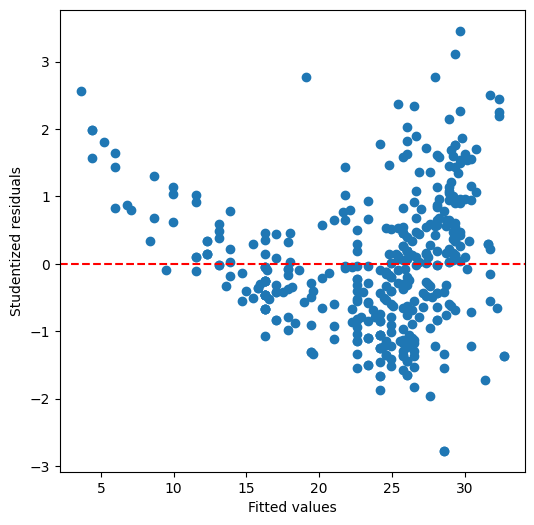

In [140]:
# create studentized residuals
student_resid = influence2.resid_studentized_internal
ax = subplots(figsize=(6,6))[1] # create a new figure
ax.scatter(model2.fittedvalues, student_resid) # create a scatter plot of the residuals
ax.axhline(0, color='red', linestyle='--') # add a horizontal line at 0
ax.set_xlabel('Fitted values') # set the x-axis label
ax.set_ylabel('Studentized residuals') # set the y-axis label


In [219]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,horse_cylinder,disp_cylinder,weight_acceleration,year_weight,cyl_acce
0,18.0,8,307.0,130,3504,12.0,70,1,1040,2456.0,42048.0,245280,96.0
1,15.0,8,350.0,165,3693,11.5,70,1,1320,2800.0,42469.5,258510,92.0
2,18.0,8,318.0,150,3436,11.0,70,1,1200,2544.0,37796.0,240520,88.0
3,16.0,8,304.0,150,3433,12.0,70,1,1200,2432.0,41196.0,240310,96.0
4,17.0,8,302.0,140,3449,10.5,70,1,1120,2416.0,36214.5,241430,84.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,344,560.0,43524.0,228780,62.4
388,44.0,4,97.0,52,2130,24.6,82,2,208,388.0,52398.0,174660,98.4
389,32.0,4,135.0,84,2295,11.6,82,1,336,540.0,26622.0,188190,46.4
390,28.0,4,120.0,79,2625,18.6,82,1,316,480.0,48825.0,215250,74.4


In [222]:
# Create polynomial features
from sklearn.preprocessing import PolynomialFeatures
X = ms([pol('horsepower', degree=2), 'acceleration']).fit_transform(df)
model_poly = sm.OLS(y, X).fit()
summarize(model_poly)

,coef,std err,t,P>|t|
intercept,35.6259,1.640,21.719,0.000
"poly(horsepower, degree=3)[0]",-149.6035,5.680,-26.340,0.000
"poly(horsepower, degree=3)[1]",48.3116,4.133,11.689,0.000
"poly(horsepower, degree=3)[2]",-5.5683,4.100,-1.358,0.175
acceleration,-0.7837,0.105,-7.485,0.000


## 10 Answer using Carset data

In [235]:
# load the data
df = load_data('Carseats')
df = df.dropna() # drop missing values
df.info() # check the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    float64 
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    category
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    category
 10  US           400 non-null    category
dtypes: category(3), float64(1), int64(7)
memory usage: 26.7 KB


In [247]:
# Multiple linear regression
X = ms(['Price', 'Urban', 'US']).fit_transform(df) # create the model specification
y = df['Sales'] # create the response variable
model = sm.OLS(y, X).fit() # fit the model
summarize(model)

,coef,std err,t,P>|t|
intercept,13.0435,0.651,20.036,0.000
Price,-0.0545,0.005,-10.389,0.000
Urban[Yes],-0.0219,0.272,-0.081,0.936
US[Yes],1.2006,0.259,4.635,0.000


1. a
2. b- intecept representerar the förutsägelse värde för respons när 

In [246]:
# Manually create a multiple linear regression model
X = df[['Price', 'Urban', 'US']]
y = df['Sales']
X.insert(0, 'intercept', 1) # add a constant to the model
X.head() # check the data
# Create dummy variables
X['Urban'] = X['Urban'].replace({'Yes' : 1, 'No' : 0})
X['US'] = X['US'].replace({'Yes' : 1, 'No' : 0})

# Fit the model manually
model = lambda X, y: np.linalg.inv(X.T @ X) @ X.T @ y
model(X, y)


/var/folders/6r/q2wyz38j5vddk8gzyblv_jh40000gn/T/ipykernel_1418/973180939.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Urban'] = X['Urban'].replace({'Yes' : 1, 'No' : 0})
/var/folders/6r/q2wyz38j5vddk8gzyblv_jh40000gn/T/ipykernel_1418/973180939.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['US'] = X['US'].replace({'Yes' : 1, 'No' : 0})


ValueError: matrices are not aligned

In [ ]:
# @ operator is used to perform matrix multiplication
# in numpy the matmul operator overloaded to perform matrix multiplication
X.T @ X # calculate the crossproduct of X

In [7]:
import numpy as np
import pandas as pd 
from matplotlib.pyplot import subplots
import statsmodels.api as sm  # import statsmodels this is the library we will use to fit the model
# statsmodels is a library for statistical modeling and testing
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from matplotlib.pyplot import subplots
# variance_inflation_factor is a function that calculates the variance inflation factor
# which is used to detect multicollinearity
from statsmodels.stats.anova import anova_lm # anova_lm is a function that performs analysis of variance



In [2]:
# Load the data
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly) # import the ModelSpec class and the summarize function
# ModelSpec is a class that is used to create model specifications
# summarize is a function that is used to summarize the results of a fitted model

In [3]:
# function dir() is used to list all the attributes of an object
dir(MS) # list all the attributes of the ModelSpec class

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sklearn_auto_wrap_output_keys',
 '_validate_data',
 '_validate_params',
 'build_sequence',
 'build_submodel',
 'fit',
 'fit_transform',
 'get_metadata_routing',
 'get_params',
 'names',
 'set_output',
 'set_params',
 'transform']

In [28]:
A = np.array([3, 5, 11]) # create a numpy array
A.shape # get the shape of the array
A.ndim # get the number of dimensions of the array
A.size # get the number of elements in the array
A[:2] # get the first two elements of the array

dir(A) # list all the attributes of the array
A.mean() # calculate the mean of the array
A.__add__(6) # add 6 to each element of the array
A + 6 # add 6 to each element of the array
A.__add__(np.array([1, 2, 3])) # add two arrays
A.sum() # calculate the sum of the array

19

### Simple linear Regression 

- Construct model matrices aka **design matrices** 
- We use ModelSpec() transform from ISPL.models 
- Use Boston housing dataset 
- mdev(median house value) for 506 neigborhoods around Boston 
- We build a regression model to predict **mdev** using 13 predictors such as **rmvar**, **age** and **lstat** 
- Use **statsmodels** a py package that implements several common used reg methods 

In [31]:
Boston = load_data('Boston') # read the Boston dataset
Boston.info() # check the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [46]:
Boston.head() # check the data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [47]:
Boston.columns # get the columns of the dataframe

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [51]:
#X_t, y_t = Boston['lstat'], Boston['medv'] # create the features and the response variable
#beta_1 , beta_0 = np.polyfit(X_t, y_t ,deg=1) # fit a simple linear regression model
#beta_1, beta_0 # get the coefficients of the model

(-0.9500493537579885, 34.55384087938307)

In [37]:
# use sm.OLS to fit a simple linear regression model
# medv as the response and lstat as the single predictor
X = pd.DataFrame({'intercept' : np.ones(Boston.shape[0]), 'lstat' : Boston['lstat']}) # create the design matrix
X.head() # check the data
X[:5] # check the data

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94
4,1.0,5.33


In [76]:
y = Boston['medv'] # create the response variable
y[:5] # check the data

model = sm.OLS(y, X) # create the model
result = model.fit() # fit the model
result.summary() # print the summary of the model

# sm is the alias for statsmodels.api
# OLS is the class for ordinary least squares regression

summarize(result) # summarize the results of the model
# summarize is a function that is used to summarize the results of a fitted model
# it prints the coefficients, standard errors, t-statistics, p-values, and R-squared of the model
# summarize is the function in the ISLP package
# summary is a method of the result object in the statsmodels.api package

,coef,std err,t,P>|t|
intercept,34.5538,0.563,61.415,0.0
lstat,-0.9500,0.039,-24.528,0.0


### Using Transformations: Fit and transform

- Model before had one predictor and constructing X was easy. In practice we fit models with more than one predictor typically selected from an array or data frame. We may wish to introduce transformations to the variables before fitting the model, **specify interactions between variables, and expand some particular variables into sets of variables**
- **Sklearn** <> transform() and fit()

- We first describe the process for our simple reg model using a single predictor **lstat** but it will use it in more and more complex task
- Transform is made by **MS()**
- **fit()** method takes the original array and may do some initial computation on it as specifid in the transform object. For ex mean and std for centering and scaling.
- transform() applies the fitted transformation to the array of data and produces the model matrix 

In [ ]:
design = MS(['lstat']) # create the model specification
design # print the model specification
design = design.fit_transform(Boston) # create the design matrix
design[:5] # check the data

- fit() does very little, it just checks that var 'lstat' specified in design exists in Boston.
- **transform()** constructs the model matrix with 2 col's an __intercept__ and __variable lstat__
- The operations can be combined with __fit_transform()__


- object **results** has several methods that can be used for inference
- for a full summary  of the fit we use __summary()__ method 

In [57]:
result.summary() # print the summary of the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Mon, 18 Mar 2024   Prob (F-statistic):           5.08e-88
Time:                        22:13:27   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
result.params # get the coefficients of the model

intercept    34.553841
lstat        -0.950049
dtype: float64

- __get_prediction()__ method can be used to optain predictions and produce C:I and P:I  for the prediction of __mdev__ for given values of __lstat__
- We create a new dataframe only whit 'lstat' whit values for this var at which we wish to make predictions
- Use transform() method of design to create the coresponding model matrix.

In [74]:
new_df = pd.DataFrame({'lstat' : [5, 10, 15]}) # create a new dataframe with new observations
new_df # check the data

,lstat
0,5
1,10
2,15
